In [1]:
# Import necessary libraries

import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #data visualization like creating plots
import seaborn as sns #visualization library 

%matplotlib inline

In [2]:
# Load the dataset & show first 5 rows

df = pd.read_csv("C:/Users/Jessy/#DA/Bike Prices Analysis/Bike_sales_data.csv")
df.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
# Statistics 

df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [4]:
# Check for any null or missing values in each column

df.isnull().sum() # 0 missing/null values

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [5]:
# Check for duplicates

duplicateRows = df[df.duplicated()]
duplicateRows # I will leave this be, since somebody could purchase same item with same amount of quantity

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1021,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1091,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1093,2013-10-24,24,October,2013,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
1095,2015-10-24,24,October,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10,4,4,8
1193,2016-01-15,15,January,2016,42,Adults (35-64),M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5,29,28,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111029,2014-02-18,18,February,2014,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,854,1482,2336
111031,2016-02-18,18,February,2016,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,854,1482,2336
111265,2014-04-27,27,April,2014,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,378,1482,1860
111953,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735


In [6]:
# Check the data types

df.info() #It has 113,036 rows and 18 columns.   No problems with Dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

<Axes: xlabel='Customer_Age', ylabel='Revenue'>

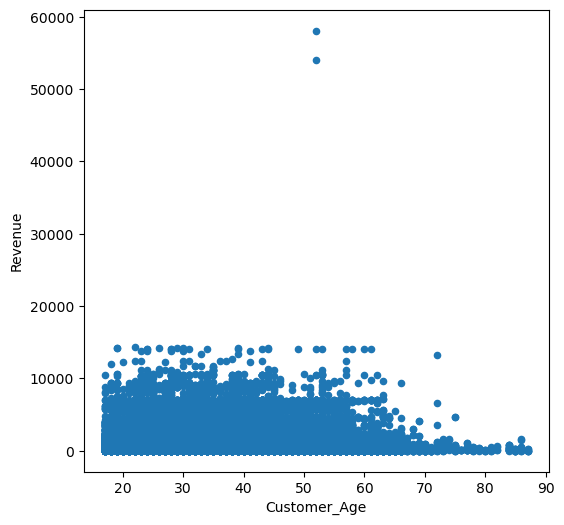

In [7]:
# Check for outliers

df.plot(kind="scatter", x="Customer_Age", y="Revenue", figsize=(6,6)) #Lets check it below

In [8]:
# lets check those 2 high revenue numbers
# The Touring-1000 Yellow, 50 Bike actually cost 2384 dollars, so I will leave it the way it is

df.nlargest(5, ['Revenue']) 

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312
59919,2011-03-20,20,March,2011,29,Young Adults (25-34),F,Germany,Bayern,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5485,8684,14169
68671,2011-07-05,5,July,2011,26,Young Adults (25-34),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 56",4,2171,3578,5485,8684,14169


In [9]:
# Making sure all values under order quantity and unit cost adds up correctly
# We got zero which is good

df['Calculated_Cost'] = df['Order_Quantity'] * df['Unit_Cost']

(df['Calculated_Cost'] != df['Cost']).sum()

0

In [10]:
# Making sure all values under profit and cost adds up correctly to the revenue
# We got zero which is good

df['Calculated_Revenue'] = df['Cost'] + df['Profit']

(df['Calculated_Revenue'] != df['Revenue']).sum()

0

In [11]:
####################################################################################################
####################################################################################################
####################################################################################################
#                                                                                                  #
#                                        Data Analysis                                             #
#                                                                                                  #
####################################################################################################
####################################################################################################
####################################################################################################

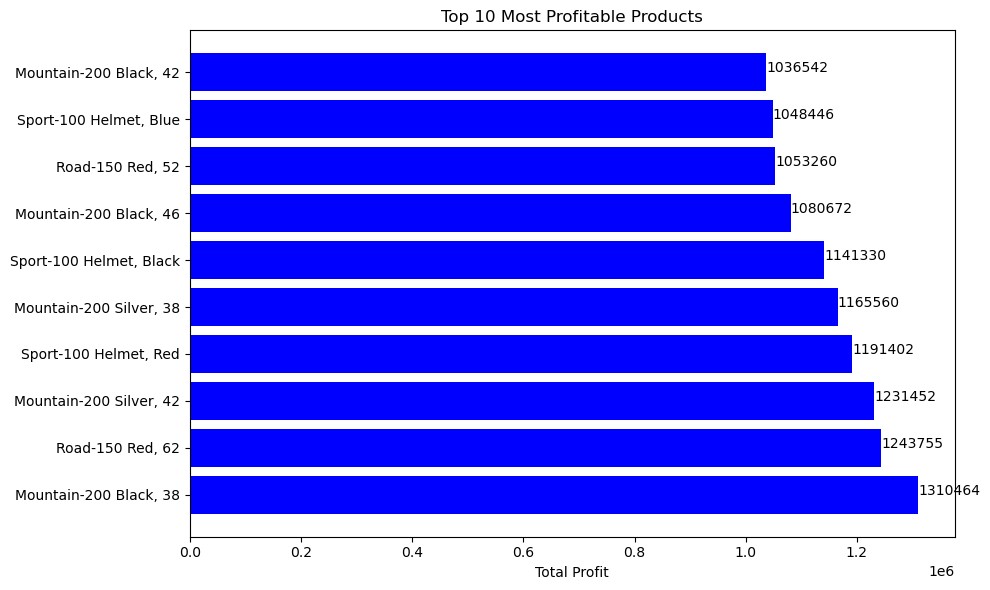

In [12]:
# Top 10 Most Profitable Products

profit_per_product = df.groupby('Product')['Profit'].sum().reset_index()
top_10_profitable_products = profit_per_product.nlargest(10, 'Profit')

plt.figure(figsize=(10, 6))
plt.barh(top_10_profitable_products['Product'], top_10_profitable_products['Profit'], color='blue')
plt.xlabel('Total Profit')
plt.title('Top 10 Most Profitable Products') 
for index, value in enumerate(top_10_profitable_products['Profit']):
    plt.text(value, index, str(value))  
plt.tight_layout()
plt.show()

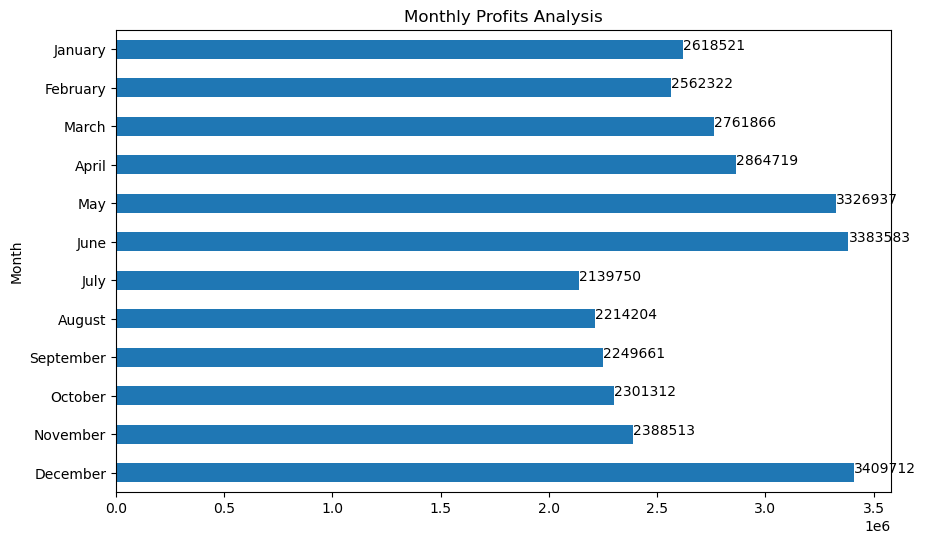

In [13]:
# Monthly Profits Analysis

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_order_reversed = months_order[::-1] 
mp = df.groupby('Month')['Profit'].sum().reindex(months_order_reversed)

plt.figure(figsize=(10, 6))
plt.title("Monthly Profits Analysis")
mp.plot(kind='barh')
for index, value in enumerate(mp):
    plt.text(value,index,str(value))

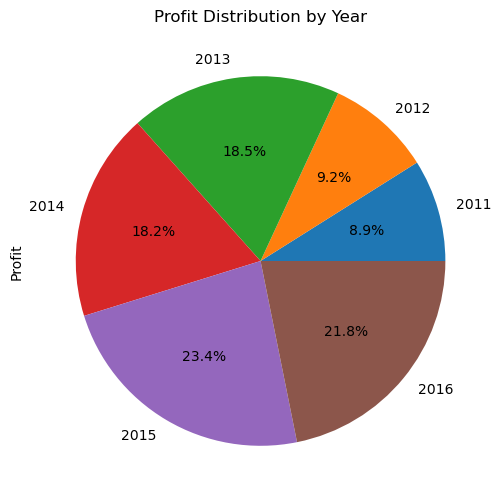

In [14]:
# Profit by year using pie chart

profit_per_year = df.groupby('Year')['Profit'].sum()
profit_per_year.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', title='Profit Distribution by Year')
plt.show()

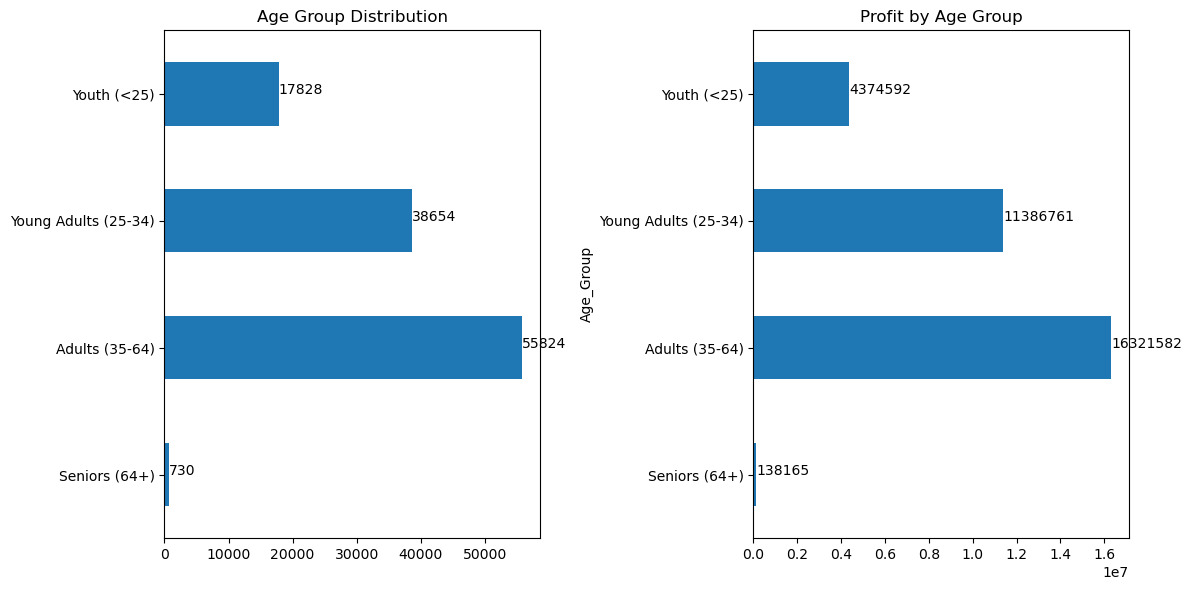

In [15]:
# Age group distribution and profits

desired_order = ['Seniors (64+)', 'Adults (35-64)', 'Young Adults (25-34)', 'Youth (<25)' ]

# Age Group Distribution
age_group_counts = df['Age_Group'].value_counts().loc[desired_order]
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

age_group_counts.plot(kind='barh', title='Age Group Distribution', ax=axes[0])
for index, value in enumerate(age_group_counts):
    axes[0].text(value, index, str(value))

# Profit by Age Group
profit_per_age_group = df.groupby('Age_Group')['Profit'].sum().loc[desired_order]
profit_per_age_group.plot(kind='barh', title='Profit by Age Group', ax=axes[1])
for index, value in enumerate(profit_per_age_group):
    axes[1].text(value, index, str(value))

plt.tight_layout()
plt.show()

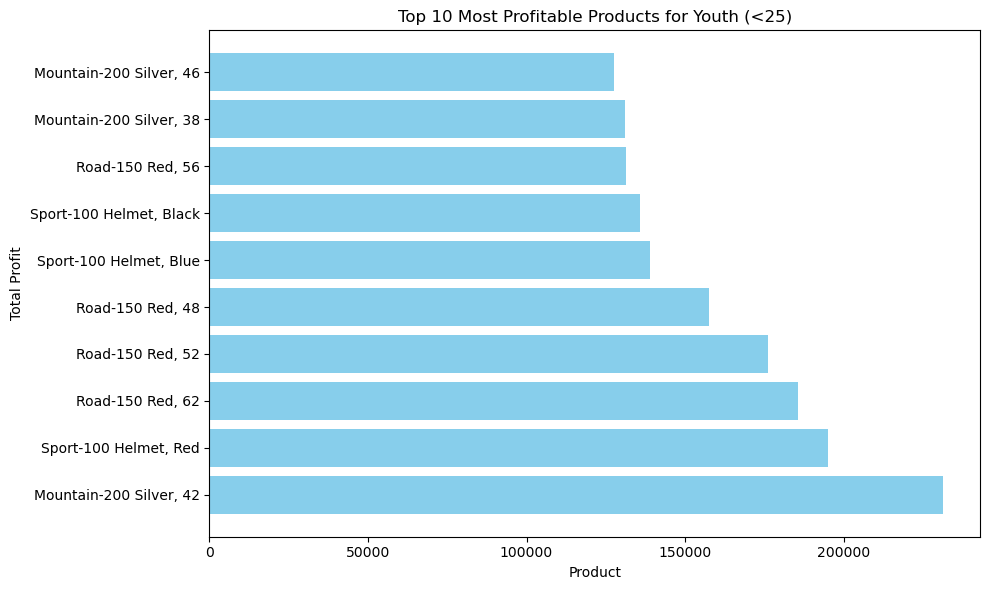

In [16]:
# Top 10 Most Profitable Products for Youth (<25)

youth_data = df[df['Age_Group'] == 'Youth (<25)']
profit_per_product_youth = youth_data.groupby('Product')['Profit'].sum().reset_index()
top_10_profitable_youth_products = profit_per_product_youth.nlargest(10, 'Profit')

plt.figure(figsize=(10, 6))
plt.barh(top_10_profitable_youth_products['Product'], top_10_profitable_youth_products['Profit'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.title('Top 10 Most Profitable Products for Youth (<25)')
plt.tight_layout()
plt.show()

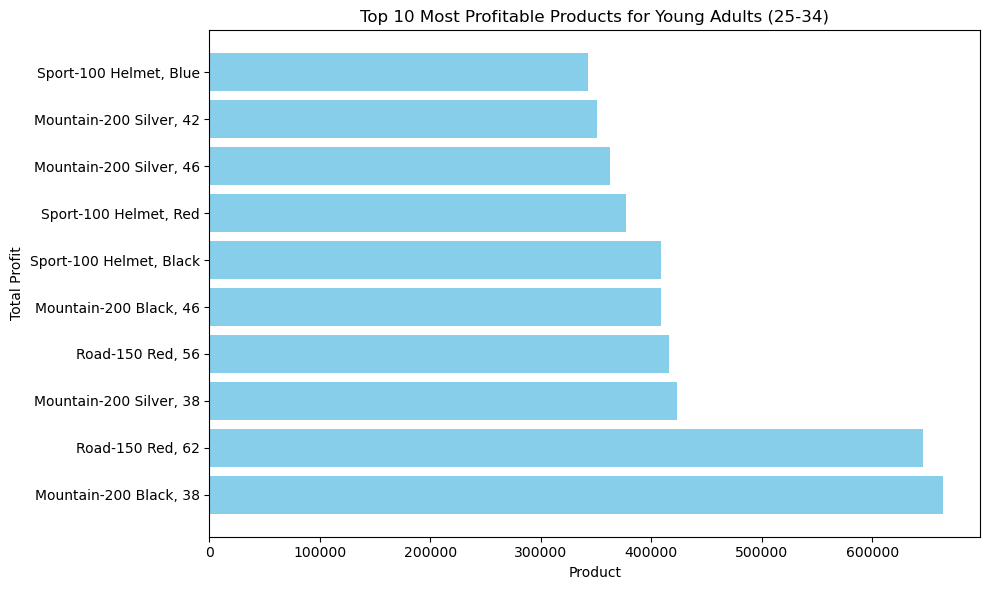

In [17]:
# Top 10 Most Profitable Products for Young Adults

Young_Adults = df[df['Age_Group'] == 'Young Adults (25-34)']
profit_per_product_young_adults = Young_Adults.groupby('Product')['Profit'].sum().reset_index()
top_10_profitable_young_adults = profit_per_product_young_adults.nlargest(10, 'Profit')

plt.figure(figsize=(10, 6))
plt.barh(top_10_profitable_young_adults['Product'], top_10_profitable_young_adults['Profit'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.title('Top 10 Most Profitable Products for Young Adults (25-34)')
plt.tight_layout()
plt.show()

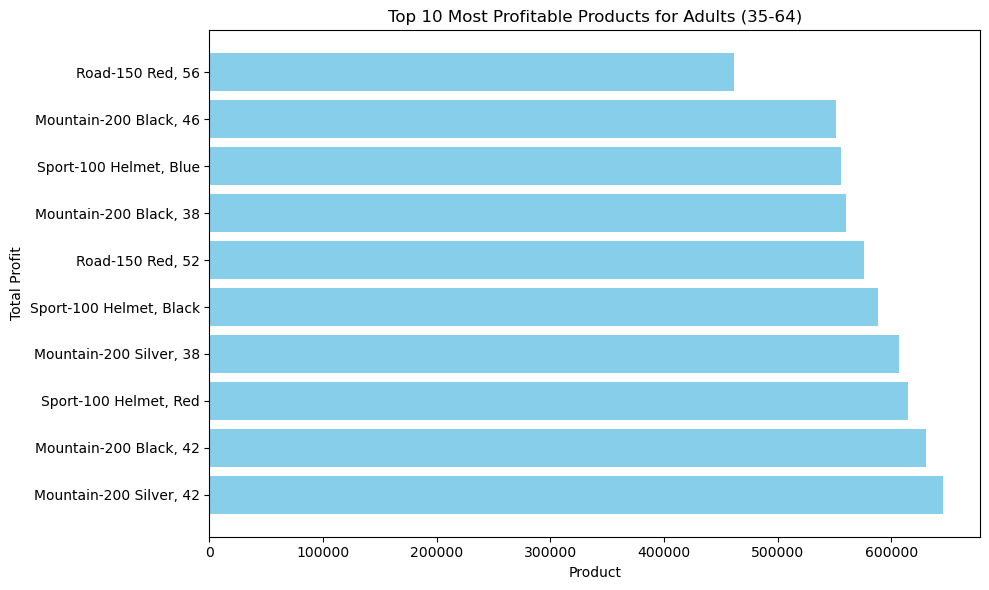

In [18]:
# Top 10 Most Profitable Products for Adults

Adults = df[df['Age_Group'] == 'Adults (35-64)']
profit_per_product_adults = Adults.groupby('Product')['Profit'].sum().reset_index()
top_10_profitable_adults = profit_per_product_adults.nlargest(10, 'Profit')

plt.figure(figsize=(10, 6))
plt.barh(top_10_profitable_adults['Product'], top_10_profitable_adults['Profit'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.title('Top 10 Most Profitable Products for Adults (35-64)')
plt.tight_layout()
plt.show()

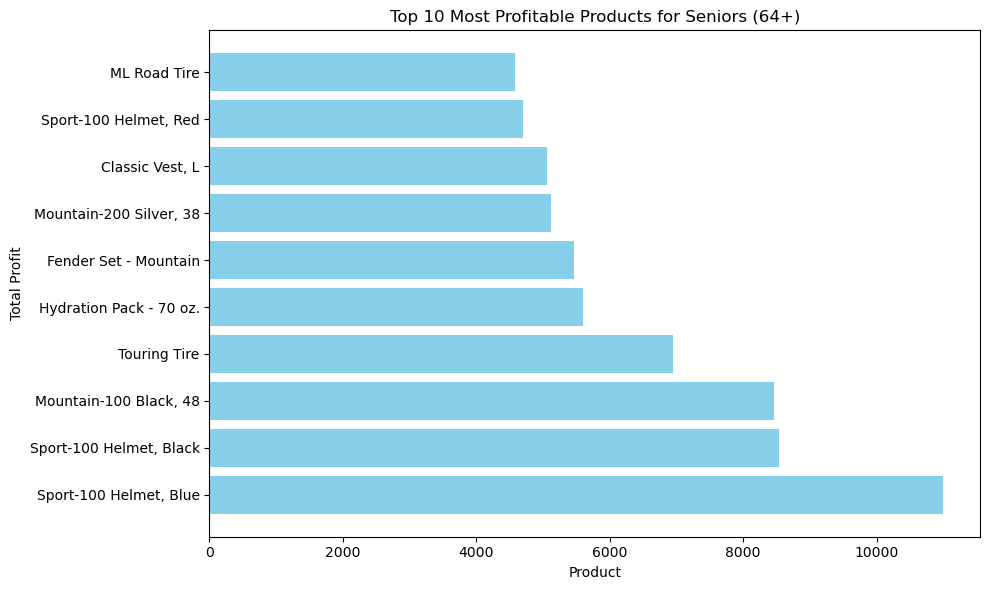

In [19]:
# Top 10 Most Profitable Products for Seniors

Seniors = df[df['Age_Group'] == 'Seniors (64+)']
profit_per_product_seniors = Seniors.groupby('Product')['Profit'].sum().reset_index()
top_10_profitable_seniors = profit_per_product_seniors.nlargest(10, 'Profit')

plt.figure(figsize=(10, 6))
plt.barh(top_10_profitable_seniors['Product'], top_10_profitable_seniors['Profit'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.title('Top 10 Most Profitable Products for Seniors (64+)')
plt.tight_layout()
plt.show()

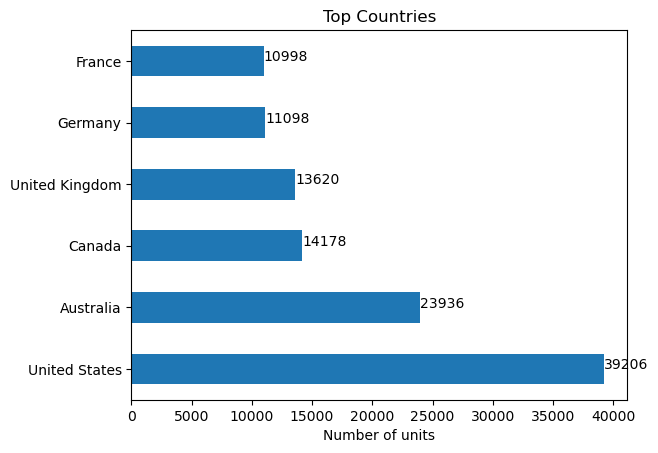

In [20]:
# Top Countries

Top_Country = df["Country"].value_counts()
Top_Country.plot(kind="barh")
plt.title("Top Countries")
plt.xlabel("Number of units")
for index, value in enumerate(Top_Country):
    plt.text(value, index, str(value))

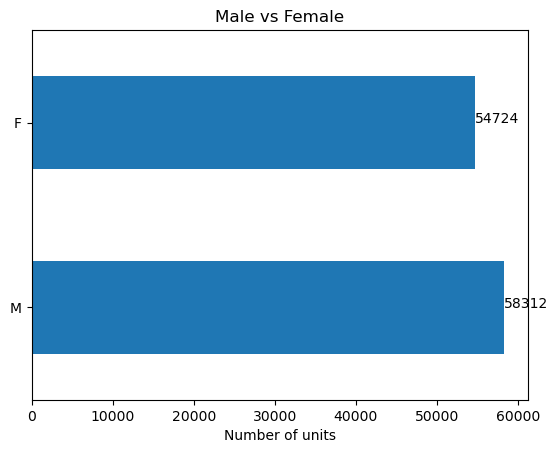

In [21]:
# Male vs Female

Gender_count = df['Customer_Gender'].value_counts()
Gender_count.plot(kind='barh')
plt.title("Male vs Female")
plt.xlabel("Number of units")
for index, value in enumerate(Gender_count):
    plt.text(value, index, str(value))

<Axes: ylabel='Country'>

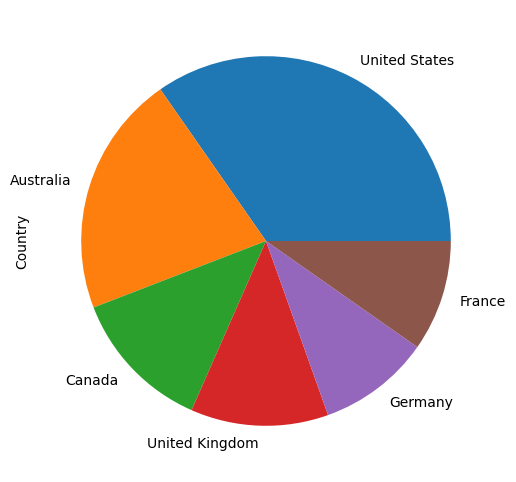

In [22]:
# Countries

df['Country'].value_counts().plot(kind='pie', figsize=(6,6))

<Axes: ylabel='Product_Category'>

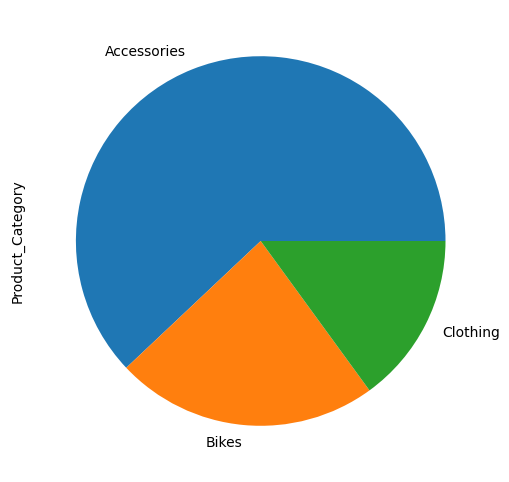

In [23]:
# Product Categories

df['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

In [24]:
df.groupby("Country").describe().transpose()

Country                      Australia        Canada        France  \
Day                count  23936.000000  14178.000000  10998.000000   
                   mean      15.720254     15.501340     15.783779   
                   std        8.809928      8.820438      8.719278   
                   min        1.000000      1.000000      1.000000   
                   25%        8.000000      8.000000      8.000000   
...                                ...           ...           ...   
Calculated_Revenue min        2.000000      2.000000      2.000000   
                   25%       70.000000     54.000000     60.000000   
                   50%      300.500000    144.000000    249.000000   
                   75%      974.000000    594.000000    851.000000   
                   max    58074.000000  14312.000000  13740.000000   

Country                        Germany  United Kingdom  United States  
Day                count  11098.000000    13620.000000   39206.000000  
                   mean      15.575419       15.681645      15.678876  
                   std        8.900618        8.676021       8.769588  
                   min        1.000000        1.000000       1.000000  
                   25%        8.000000        8.000000       8.000000  
...                                ...             ...            ...  
Calculated_Revenue min        2.000000        2.000000       2.000000  
                   25%       77.000000       73.000000      59.000000  
                   50%      312.000000      253.000000     196.000000  
                   75%      886.000000      874.000000     754.000000  
                   max    14169.000000    13740.000000   14026.000000  

[88 rows x 6 columns]

In [25]:
df.groupby(["Country", "Product_Category"]).agg({"Revenue": "mean"})

Revenue
Country        Product_Category             
Australia      Accessories        203.467551
               Bikes             2399.889298
               Clothing           475.055127
Canada         Accessories        223.117670
               Bikes             2761.629845
               Clothing           574.560050
France         Accessories        207.543810
               Bikes             2283.077617
               Clothing           467.983117
Germany        Accessories        236.605255
               Bikes             2228.603018
               Clothing           423.534574
United Kingdom Accessories        230.838427
               Bikes             2229.566969
               Clothing           462.249748
United States  Accessories        210.795983
               Bikes             2439.014948
               Clothing           507.884941

In [26]:
df.groupby(["Country", "Customer_Gender"]).agg({"Revenue": "mean"})

Revenue
Country        Customer_Gender            
Australia      F                943.902833
               M                840.025181
Canada         F                564.036484
               M                556.073549
France         F                729.411519
               M                804.184747
Germany        F                847.600503
               M                770.134998
United Kingdom F                787.590435
               M                775.895918
United States  F                707.048379
               M                719.627713